In [967]:
pip install numpy matplotlib pandas sklearn seaborn requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [968]:
import numpy as np
import pandas as pd

In [969]:
books = pd.read_csv('Books.csv', dtype='unicode')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

In [970]:
print(books.shape)
books.head()

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [971]:
print(ratings.shape)
ratings.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [972]:
print(users.shape)
users.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Checking for Null Values

In [973]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [974]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

As datatype for column 'Book-Author', , 'Publisher', and 'Image-URL-L' is object, thus assinging the Null publisher values as 'Unknown' below.

In [975]:
books[['Book-Author', 'Publisher','Image-URL-L']]= books[['Book-Author', 'Publisher','Image-URL-L']].fillna('Unknown')
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [976]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [977]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [978]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

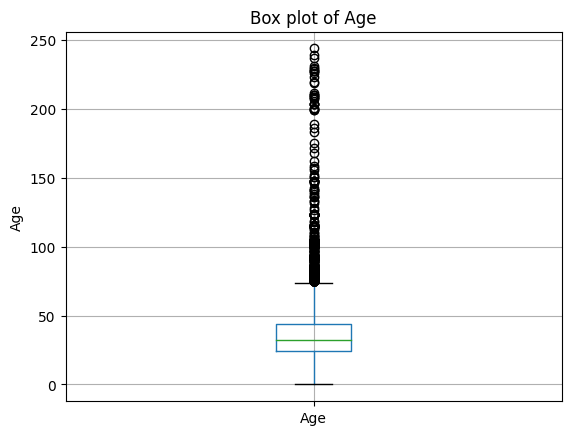

In [979]:
import matplotlib.pyplot as plt

# create a box plot of age column
users.boxplot('Age')

# add title and axis labels
plt.title('Box plot of Age')
plt.ylabel('Age')

# show the plot
plt.show()

As there are lots of outliers ther for 'Age' column we are going to assign nan values with the median value only.

In [980]:
median_value= users['Age'].median
users['Age'].fillna(median_value, inplace=True)
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [981]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

There are no NAN values for bookRating.

In [982]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

Thus, bookRatings varies from 0 to 10
### Sparsity calculation:

Sparsity calculation is the process of measuring the degree of sparsity in a dataset. Sparsity is typically defined as the proportion of zero or missing values in a dataset, with higher sparsity indicating a greater proportion of zeros or missing values.

In [983]:
ratings_data = ratings[ratings['ISBN'].isin(books['ISBN'])]

Ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset

In [984]:
ratings_data = ratings_data[ratings_data['User-ID'].isin(users['User-ID'])]

Also Ratings dataset should have ratings from users which exist in users dataset, unless new users are added to users dataset

In [985]:
sparsity = 1 - (len(ratings_data)/(users.shape[0] * books.shape[0]))
print("No. of users = " + str(users.shape[0]) + "\nNo. of Books = " + str(books.shape[0]) + "\nSparsity " + str(sparsity*100) + " % ")

No. of users = 278858
No. of Books = 271360
Sparsity 99.99863734155898 % 


From above we can say that the dataset is very sparse which is about 99%

In [986]:
books.duplicated().sum()

0

In [987]:
users.duplicated().sum()

0

In [988]:
ratings.duplicated().sum()

0

### EDA Analysis

Merging Books and Ratings 

In [989]:
merged_data = pd.merge(books, ratings_data, on='ISBN')
merged_data =  merged_data.sort_values('ISBN', ascending=True)
merged_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8
968138,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,86123,0
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0
542150,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,23902,9
788100,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,196149,0


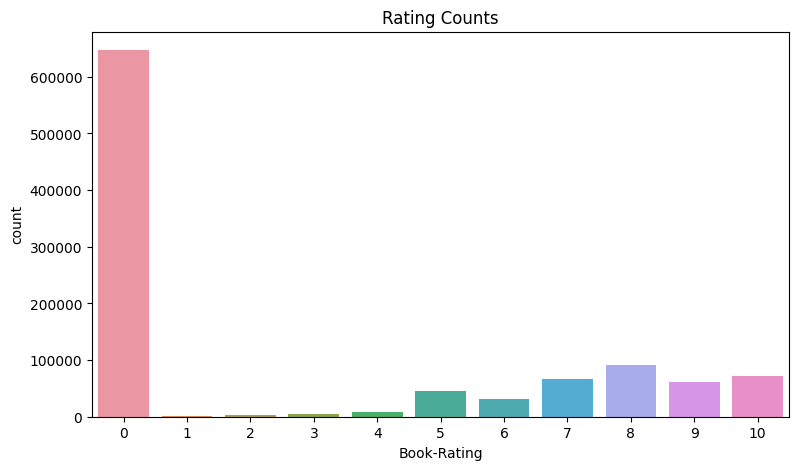

In [990]:
import seaborn as sns
plt.figure(figsize=(9, 5))
plt.title('Rating Counts')
sns.countplot(x = 'Book-Rating', data = merged_data);

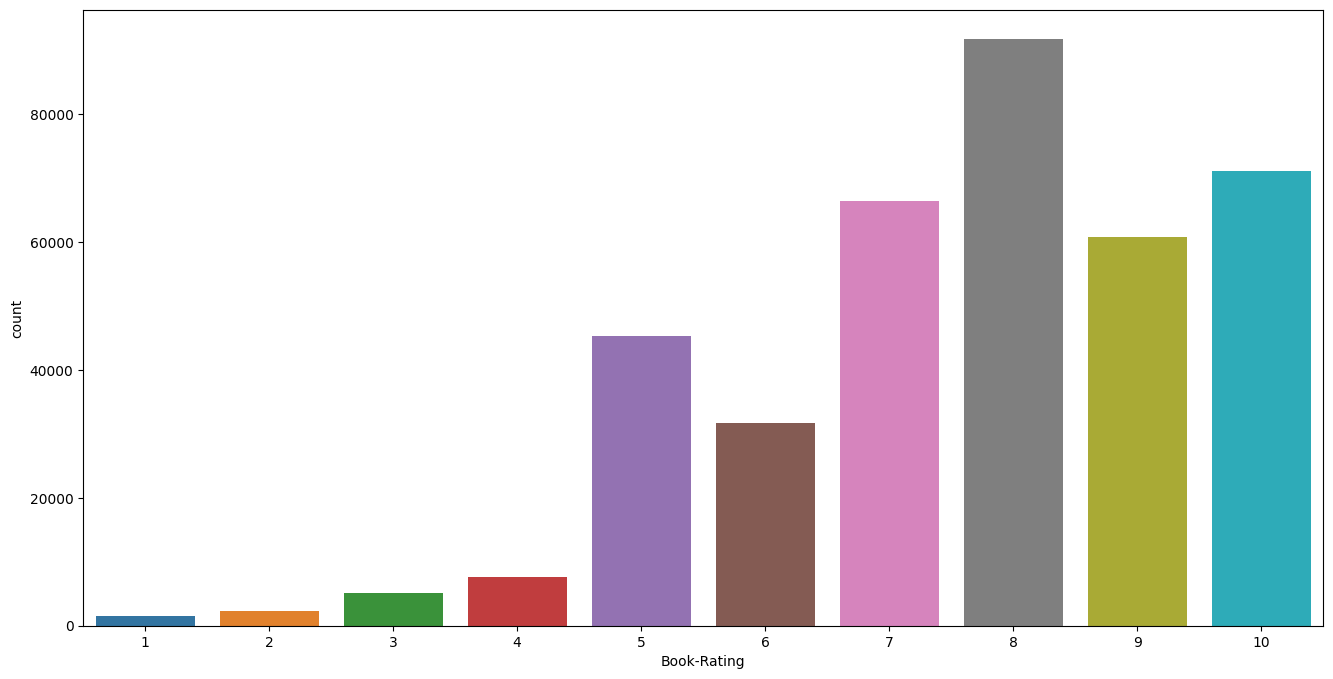

In [991]:
import seaborn as sns
filtered_rating = merged_data.loc[merged_data['Book-Rating']!= 0, :]

plt.figure(figsize=(16,8))
sns.countplot(x = 'Book-Rating', data = filtered_rating);

We may observe that rating 8 showing the higher bar-mark but many books with rating equal to 10 and 0 as many of the books are rated only once, hence this can't show us a good visualisation. Thus here we can consider average rating of a book.


In [992]:
df_num_rating = merged_data.groupby('Book-Title')['Book-Rating'].count().reset_index()
df_num_rating.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)
df_num_rating

,Book-Title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [993]:
df_avg_rating = merged_data.groupby('Book-Title')['Book-Rating'].mean().reset_index()
df_avg_rating.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
df_avg_rating

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [994]:
book_rating_df = pd.merge(df_num_rating, df_avg_rating, on='Book-Title')
book_rating_df =  book_rating_df.sort_values('num_of_rating', ascending=False)
book_rating_df.head()

,Book-Title,num_of_rating,avg_rating
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193


C:\Users\Shikho User\AppData\Local\Temp\ipykernel_18372\3519076765.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=filtered_df['avg_rating'], kde=True, color='r')


<Axes: xlabel='avg_rating', ylabel='Density'>

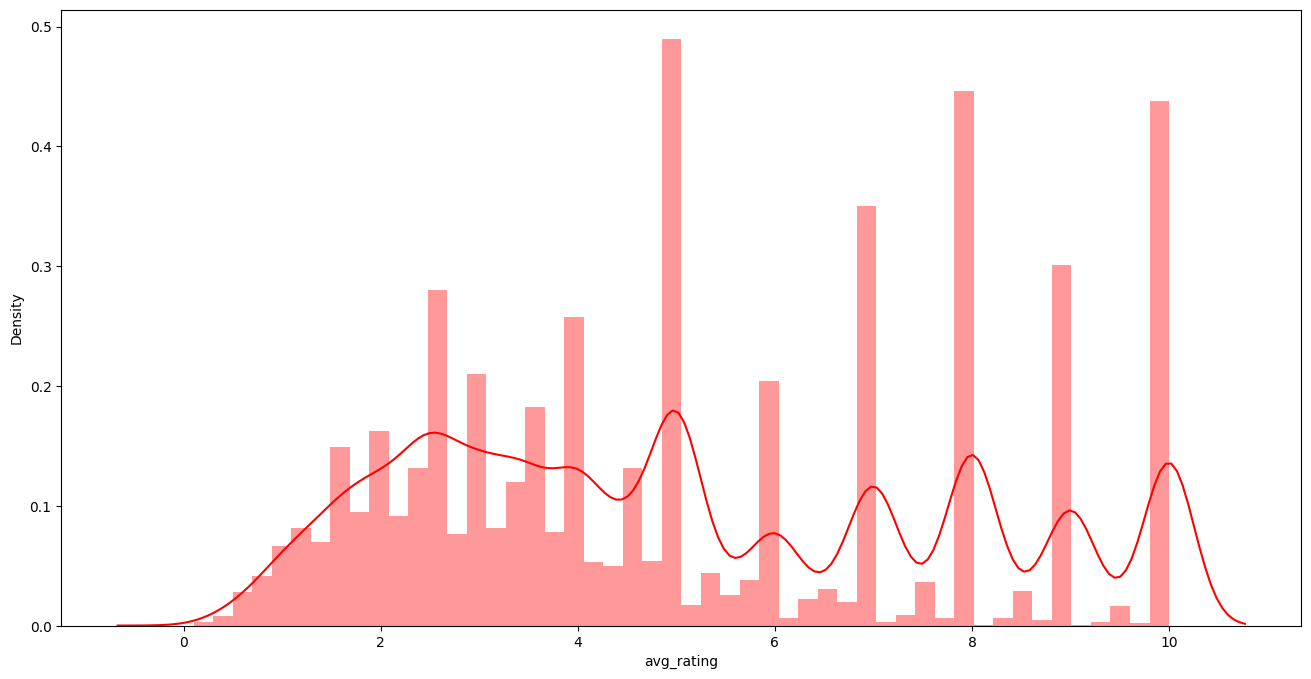

In [995]:
plt.figure(figsize=(16,8))
filtered_df = book_rating_df.loc[book_rating_df['avg_rating']!= 0, :]
sns.distplot(a=filtered_df['avg_rating'], kde=True, color='r')

Therefore, the most common rating is somewhere between 2 to 4.

C:\Users\Shikho User\AppData\Local\Temp\ipykernel_18372\2915934889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=filtered_df['num_of_rating'], kde=True, color='r')


<Axes: xlabel='num_of_rating', ylabel='Density'>

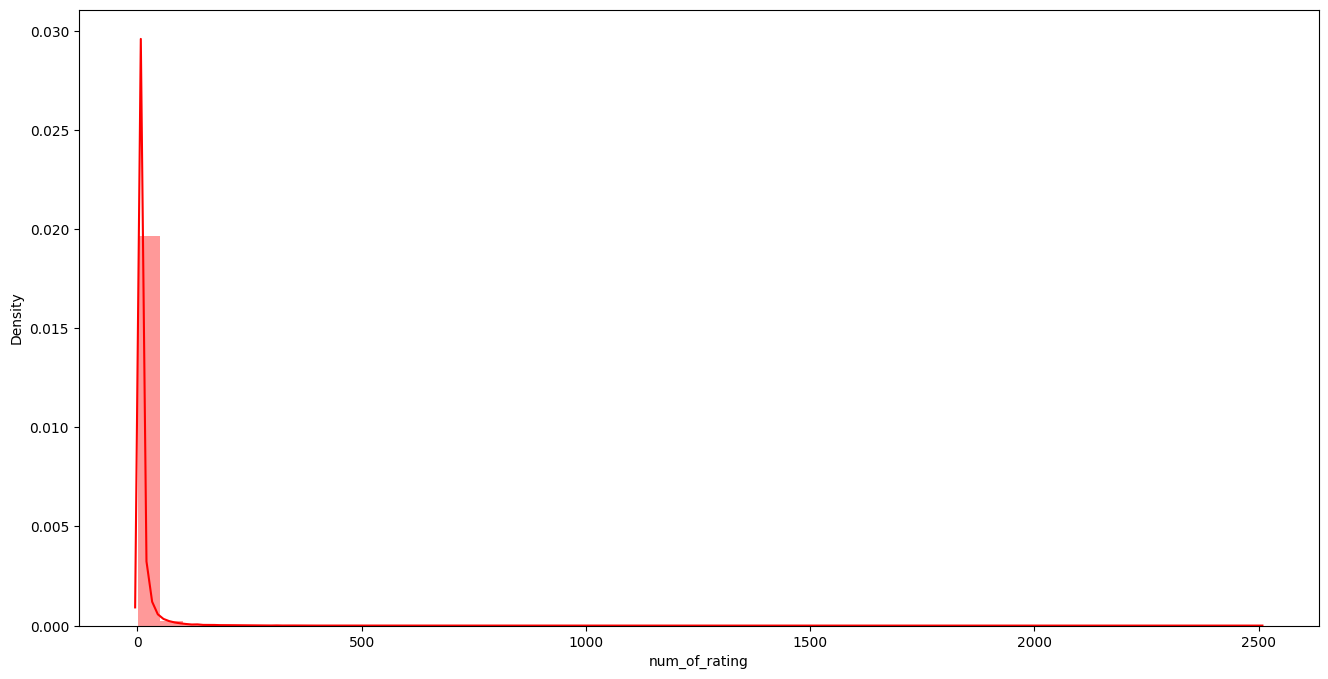

In [996]:
plt.figure(figsize=(16,8))
sns.distplot(a=filtered_df['num_of_rating'], kde=True, color='r')

In [997]:
filtered_df['num_of_rating(log)'] =  np.log(filtered_df['num_of_rating'])

C:\Users\Shikho User\AppData\Local\Temp\ipykernel_18372\2408902520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['num_of_rating(log)'] =  np.log(filtered_df['num_of_rating'])


In [998]:
filtered_df

,Book-Title,num_of_rating,avg_rating,num_of_rating(log)
234951,Wild Animus,2502,1.019584,7.824846
196326,The Lovely Bones: A Novel,1295,4.468726,7.166266
183573,The Da Vinci Code,898,4.642539,6.800170
5303,A Painted House,838,3.231504,6.731018
199237,The Nanny Diaries: A Novel,828,3.530193,6.719013
...,...,...,...,...
63659,Fabulous Cookies (Barron's Easy Cooking Series),1,5.000000,0.000000
63660,Fabulous Cookies: Scrumptious Recipes for Deli...,1,6.000000,0.000000
63662,Fabulous Facts about Fifty States,1,8.000000,0.000000
147558,Real Love: The Drawings for Sean,1,10.000000,0.000000


Dropping users who have rated less than 50 times

In [999]:
popular_df = filtered_df [filtered_df['num_of_rating']>=50].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Book-Title,num_of_rating,avg_rating,num_of_rating(log)
70396,Free,56,8.017857,4.025352
208575,The Stand (The Complete and Uncut Edition),57,6.175439,4.043051
77812,Griffin &amp; Sabine: An Extraordinary Corresp...,72,6.041667,4.276666
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,6.059123
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,5.958425
195672,The Little Prince,141,5.815603,4.948760
180518,The Cat in the Hat,53,5.754717,3.970292
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,5.627621
191607,The Hobbit,80,5.700000,4.382027
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,5.849325


In [1000]:
popular_df= pd.merge(popular_df, books[['Book-Title','Book-Author','Image-URL-M']], on='Book-Title').drop_duplicates('Book-Title')
popular_df

,Book-Title,num_of_rating,avg_rating,num_of_rating(log),Book-Author,Image-URL-M
0,Free,56,8.017857,4.025352,Paul Vincent,http://images.amazon.com/images/P/1844262553.0...
3,The Stand (The Complete and Uncut Edition),57,6.175439,4.043051,Stephen King,http://images.amazon.com/images/P/0385199570.0...
4,Griffin &amp; Sabine: An Extraordinary Corresp...,72,6.041667,4.276666,Nick Bantock,http://images.amazon.com/images/P/0877017883.0...
5,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,6.059123,J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...
8,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,5.958425,J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...
10,The Little Prince,141,5.815603,4.948760,Antoine de Saint-ExupÃ©ry,http://images.amazon.com/images/P/0156528207.0...
15,The Cat in the Hat,53,5.754717,3.970292,Dr. Seuss,http://images.amazon.com/images/P/039480001X.0...
17,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,5.627621,J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...
21,The Hobbit,80,5.700000,4.382027,J. R. R. Tolkien,http://images.amazon.com/images/P/0345272579.0...
33,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,5.849325,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...


In [1001]:
import requests

url = popular_df['Image-URL-M'][0]

# # Get the image from the URL and open it using matplotlib
# img = plt.imread(requests.get(url, stream=True).raw, format='jpeg')

# # Display the image using matplotlib
# plt.imshow(img)
# plt.show()

### Collaborative Filtering Based Recommender System

C:\Users\Shikho User\AppData\Local\Temp\ipykernel_18372\2948506325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=merged_data.groupby('User-ID')['Book-Rating'].count(), kde=True, color='r')


<Axes: xlabel='Book-Rating', ylabel='Density'>

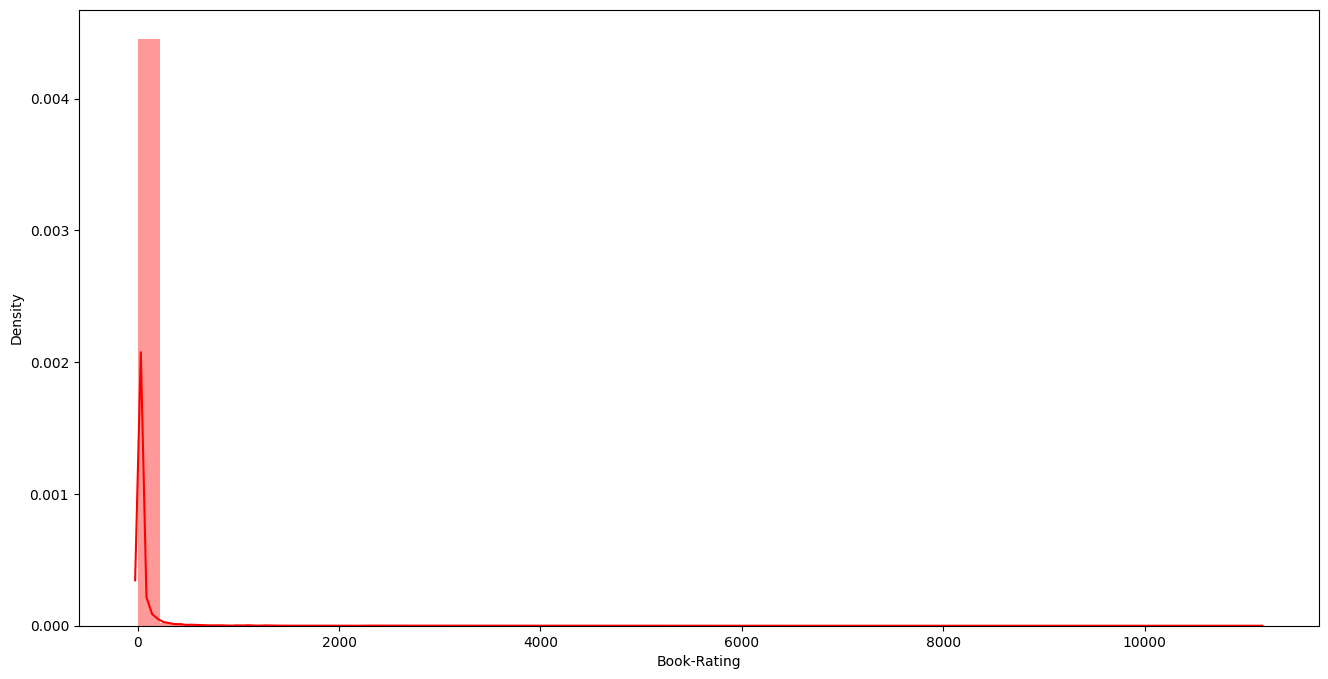

In [1002]:
plt.figure(figsize=(16,8))
sns.distplot(a=merged_data.groupby('User-ID')['Book-Rating'].count(), kde=True, color='r')

In [1003]:
filtered_user = merged_data.groupby('User-ID').count()['Book-Rating'] > 200
filtered_user_index = filtered_user[filtered_user].index
filtered_user_index

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [1004]:
filtered_dff = merged_data[merged_data['User-ID'].isin(filtered_user_index)]
filtered_dff

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,171118,8
968139,0001010565,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,209516,0
542150,0001046438,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,23902,9
542211,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,23902,6
541234,0001047213,The Fighting Man,Gerald Seymour,1993,HarperCollins Publishers,http://images.amazon.com/images/P/0001047213.0...,http://images.amazon.com/images/P/0001047213.0...,http://images.amazon.com/images/P/0001047213.0...,23902,9
...,...,...,...,...,...,...,...,...,...,...
954159,B0001I1KOG,New York Public Library Literature Companion,New York Public Library,2001,Free Press,http://images.amazon.com/images/P/B0001I1KOG.0...,http://images.amazon.com/images/P/B0001I1KOG.0...,http://images.amazon.com/images/P/B0001I1KOG.0...,148258,10
753052,B0001PIOX4,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,271705,0
937599,B000234N3A,Fraud,David Rakoff,2001,Doubleday,http://images.amazon.com/images/P/B000234N3A.0...,http://images.amazon.com/images/P/B000234N3A.0...,http://images.amazon.com/images/P/B000234N3A.0...,100906,9
670608,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,264317,0


In [1005]:
filtered_books = filtered_dff.groupby('Book-Title').count()['Book-Rating']>50
filtered_books_index = filtered_books[filtered_books].index

In [1006]:
filtered_dff = filtered_dff[filtered_dff['Book-Title'].isin(filtered_books_index)]

In [1007]:
filtered_dff

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
307405,0001047973,Brave New World,Aldous Huxley,1999,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,http://images.amazon.com/images/P/0001047973.0...,23902,9
921794,0006177379,Secrets,Vera Cowie,1990,HarperCollins Publishers,http://images.amazon.com/images/P/0006177379.0...,http://images.amazon.com/images/P/0006177379.0...,http://images.amazon.com/images/P/0006177379.0...,110029,0
996321,0020697406,The Lost World,Randall Jarrell,1985,Simon &amp; Schuster,http://images.amazon.com/images/P/0020697406.0...,http://images.amazon.com/images/P/0020697406.0...,http://images.amazon.com/images/P/0020697406.0...,149907,0
139443,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,126604,0
139388,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,26535,0
...,...,...,...,...,...,...,...,...,...,...
586901,B00009NDAN,Winter Solstice,Rosamunde Pilcher,2000,St. Martin's Press,http://images.amazon.com/images/P/B00009NDAN.0...,http://images.amazon.com/images/P/B00009NDAN.0...,http://images.amazon.com/images/P/B00009NDAN.0...,274301,10
865667,B0000T6KHI,Three Fates,Nora Roberts,2002,Putnam Pub Group,http://images.amazon.com/images/P/B0000T6KHI.0...,http://images.amazon.com/images/P/B0000T6KHI.0...,http://images.amazon.com/images/P/B0000T6KHI.0...,69697,0
865668,B0000T6KHI,Three Fates,Nora Roberts,2002,Putnam Pub Group,http://images.amazon.com/images/P/B0000T6KHI.0...,http://images.amazon.com/images/P/B0000T6KHI.0...,http://images.amazon.com/images/P/B0000T6KHI.0...,112001,10
753052,B0001PIOX4,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,271705,0


In [1008]:
pivot_data = filtered_dff.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot_data

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [1009]:
pivot_data.fillna(0,inplace=True)

In [1010]:
pivot_data

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity Implementation

In [1011]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1012]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(pivot_data)

In [1013]:
similarity_scores.shape

(679, 679)

In [966]:
def recommend(book_name):
    # index fetch
    index = np.where(pivot_data.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
    print(similar_items)
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pivot_data.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [1014]:
recommend('1984')

[(46, 0.2702651417103732), (524, 0.26396193711234966), (80, 0.2366937434740099), (610, 0.23299389358170397), (530, 0.2262639743141286)]


[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

### Build Nearest Neighbour Model

In [1015]:
# Import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# Build NearestNeighbors Object
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=7, n_jobs=-1)

# Fit the NearestNeighbor
model_nn.fit(pivot_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=7)

#### Generate Recommendations
Let’s make a forecast using a trained model of NearestNeighbours and generate a list of recommended books.

In [1019]:
def recommend_NN(book_name):
    # Get top 5 nearest neighbors 
    indices=model_nn.kneighbors(pivot_data.loc[[book_name]], 5, return_distance=False)
    print(indices)
    # Print the recommended books
    print("Recommended Books:")
    print("==================")

    data = []
    for index, value in enumerate(pivot_data.index[indices][0]):
        item = []
        temp_df = books[books['Book-Title'] == pivot_data.index[index]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)
    return data
   
    

In [1020]:
recommend_NN('1984')

[[  0  46 524  80 610 530]]
Recommended Books:


C:\Users\Shikho User\AppData\Local\Temp\ipykernel_18372\56428391.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  for index, value in enumerate(pivot_data.index[indices][0]):


[['1st to Die: A Novel',
  'James Patterson',
  'http://images.amazon.com/images/P/0446610038.01.MZZZZZZZ.jpg'],
 ['2nd Chance',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693200.01.MZZZZZZZ.jpg'],
 ['4 Blondes',
  'Candace Bushnell',
  'http://images.amazon.com/images/P/0451203895.01.MZZZZZZZ.jpg'],
 ['A Bend in the Road',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446527785.01.MZZZZZZZ.jpg'],
 ['A Case of Need',
  'Michael Crichton',
  'http://images.amazon.com/images/P/0451183665.01.MZZZZZZZ.jpg'],
 ['A Child Called \\It\\": One Child\'s Courage to Survive"',
  'Dave Pelzer',
  'http://images.amazon.com/images/P/1558743669.01.MZZZZZZZ.jpg']]